In [1]:
from ucimlrepo import fetch_ucirepo
data=fetch_ucirepo(id=174)

In [2]:
x=data.data.features
y=data.data.targets
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fo       195 non-null    float64
 1   MDVP:Fhi      195 non-null    float64
 2   MDVP:Flo      195 non-null    float64
 3   MDVP:Jitter   195 non-null    float64
 4   MDVP:Jitter   195 non-null    float64
 5   MDVP:RAP      195 non-null    float64
 6   MDVP:PPQ      195 non-null    float64
 7   Jitter:DDP    195 non-null    float64
 8   MDVP:Shimmer  195 non-null    float64
 9   MDVP:Shimmer  195 non-null    float64
 10  Shimmer:APQ3  195 non-null    float64
 11  Shimmer:APQ5  195 non-null    float64
 12  MDVP:APQ      195 non-null    float64
 13  Shimmer:DDA   195 non-null    float64
 14  NHR           195 non-null    float64
 15  HNR           195 non-null    float64
 16  RPDE          195 non-null    float64
 17  DFA           195 non-null    float64
 18  spread1       195 non-null    

In [7]:
x.isna().sum()

MDVP:Fo         0
MDVP:Fhi        0
MDVP:Flo        0
MDVP:Jitter     0
MDVP:Jitter     0
MDVP:RAP        0
MDVP:PPQ        0
Jitter:DDP      0
MDVP:Shimmer    0
MDVP:Shimmer    0
Shimmer:APQ3    0
Shimmer:APQ5    0
MDVP:APQ        0
Shimmer:DDA     0
NHR             0
HNR             0
RPDE            0
DFA             0
spread1         0
spread2         0
D2              0
PPE             0
dtype: int64

In [3]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  195 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [4]:
x.head()

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
#Feature Selection
log_reg=LogisticRegression(max_iter=1000,random_state=42)
sfs=SFS(estimator=log_reg,
       k_features='best',
       forward=True, 
       floating=False, 
       scoring='accuracy',
       cv=5)
sfs=sfs.fit(xtrain,ytrain)
selected_features=list(sfs.k_feature_names_)
print("SFS Selected Features",selected_features)
print("SFS selected Feature Score",sfs.k_score_)

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

SFS Selected Features ['MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'RPDE', 'spread1', 'D2']
SFS selected Feature Score 0.8590725806451613


C:\Users\91944\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
x_selected=x[selected_features]
x_selected

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,RPDE,spread1,D2
0,119.992,157.302,74.997,0.414783,-4.813031,2.301442
1,122.400,148.650,113.819,0.458359,-4.075192,2.486855
2,116.682,131.111,111.555,0.429895,-4.443179,2.342259
3,116.676,137.871,111.366,0.434969,-4.117501,2.405554
4,116.014,141.781,110.655,0.417356,-3.747787,2.332180
...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.448439,-6.538586,2.657476
191,209.516,253.017,89.488,0.431674,-6.195325,2.784312
192,174.688,240.005,74.287,0.407567,-6.787197,2.679772
193,198.764,396.961,74.904,0.451221,-6.744577,2.138608


In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x_selected,y,test_size=0.2,random_state=42)
xtrain.shape

(156, 6)

In [16]:
#Logistic Regression
lr_model=LogisticRegression(
penalty='l1',#elasticnet l1 and l2
C=1.0,
    fit_intercept=True,
    random_state=None,
    solver='liblinear',
    max_iter=1000,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None
)
lr_model.fit(xtrain,ytrain)

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', penalty='l1',
                   solver='liblinear')

In [17]:
lrpred=lr_model.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,lrpred))
print(classification_report(ytest,lrpred))

Accuracy :  0.8461538461538461
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



Text(0.5, 1.0, 'Confusion Matrix')

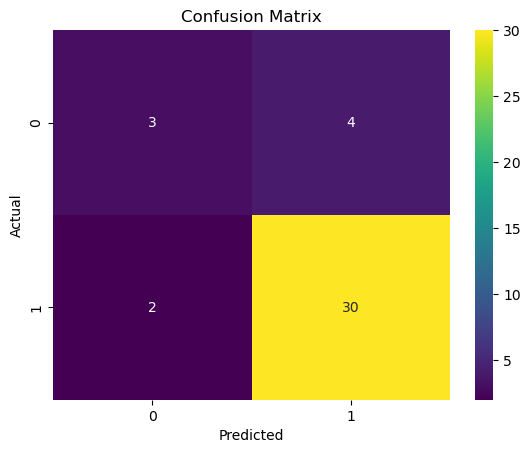

In [19]:
cm=confusion_matrix(ytest,lrpred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [20]:
#Decision Tree
dt=DecisionTreeClassifier(
criterion='gini',
splitter='best',
max_depth=10,
min_samples_split=2,
min_samples_leaf=1,
max_features=None,
random_state=None)
dt.fit(xtrain,ytrain)


DecisionTreeClassifier(max_depth=10)

In [21]:
dtpred=dt.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,dtpred))
print(classification_report(ytest,dtpred))

Accuracy :  0.8974358974358975
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



Text(0.5, 1.0, 'Confusion Matrix')

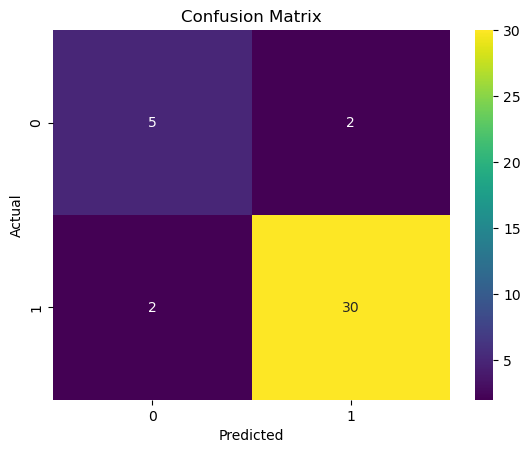

In [22]:
cm=confusion_matrix(ytest,dtpred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [23]:
#Random Forest
rf=RandomForestClassifier(n_estimators=100,
                         criterion='gini',
                         max_depth=None,
                         min_samples_split=2,
                         min_samples_leaf=1,
                         max_features='sqrt',
                         bootstrap=True,
                         random_state=None)
rf.fit(xtrain,ytrain)

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [24]:
rfpred=rf.predict(xtest)
print('Accuracy : ',accuracy_score(ytest,rfpred))
print(classification_report(ytest,rfpred))

Accuracy :  0.8974358974358975
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



Text(0.5, 1.0, 'Confusion Matrix')

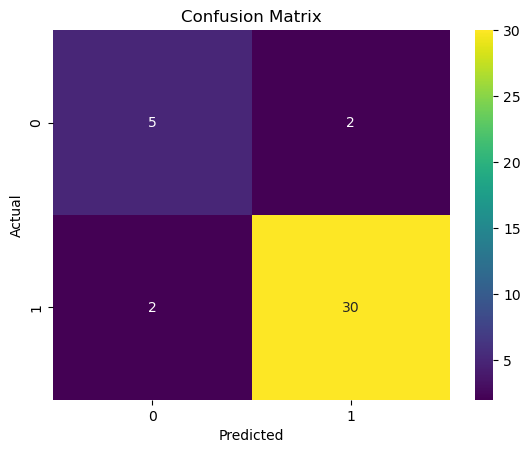

In [25]:
cm=confusion_matrix(ytest,rfpred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [26]:
#SVC
ss=StandardScaler()
x_scaled=ss.fit_transform(x_selected)
xtrain_sc,xtest_sc,ytrain_sc,ytest_sc=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [27]:
svc=SVC(  C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=42)
svc.fit(xtrain_sc,ytrain_sc)


C:\Users\91944\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [28]:
svc_pred=svc.predict(xtest_sc)
print("Accuracy : ",accuracy_score(ytest_sc,svc_pred))
print(classification_report(ytest_sc,svc_pred))

Accuracy :  0.8461538461538461
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



Text(0.5, 1.0, 'Confusion Matrix')

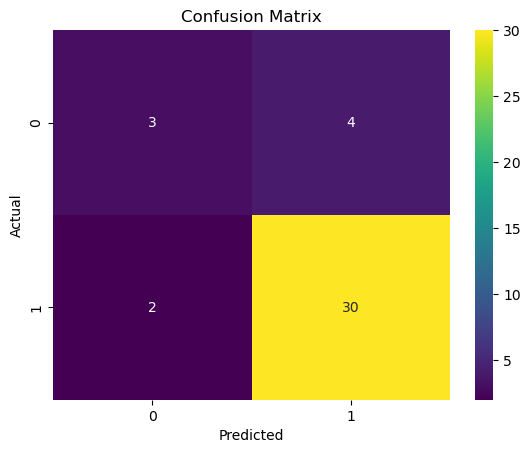

In [29]:
cm=confusion_matrix(ytest_sc,svc_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

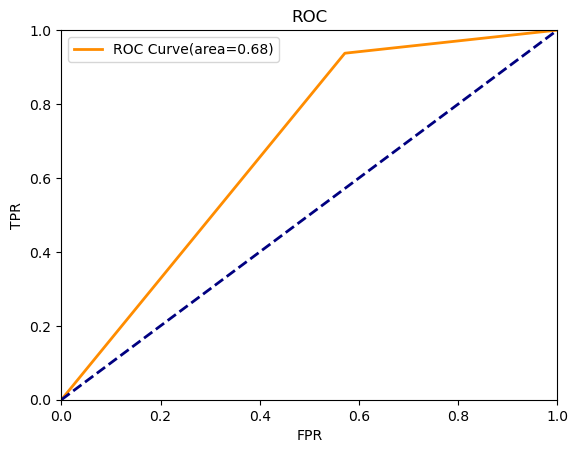

In [32]:
fpr,tpr,thresholds=roc_curve(ytest_sc,svc_pred,pos_label=1)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()
plt.show()

In [33]:
#Gradient Boosting
gb=GradientBoostingClassifier(n_estimators=100,
                             learning_rate=0.1,max_depth=3)
gb.fit(xtrain,ytrain)


C:\Users\91944\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [34]:
gbpred=gb.predict(xtest)
print('Accuracy : ',accuracy_score(ytest,gbpred))
print(classification_report(ytest,gbpred))

Accuracy :  0.8974358974358975
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



Text(0.5, 1.0, 'Confusion Matrix')

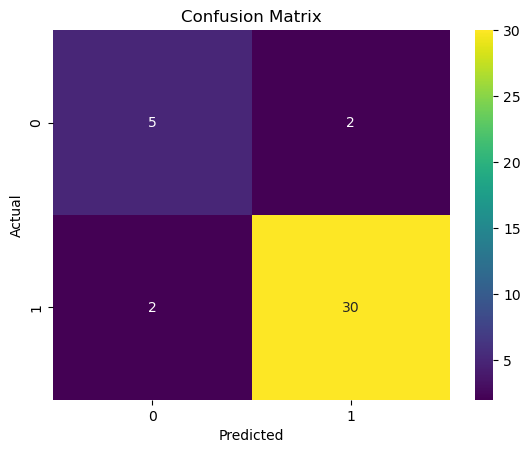

In [35]:
cm=confusion_matrix(ytest,gbpred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [36]:
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
#GLM
x_const=sm.add_constant(x_selected)
model=sm.GLM(y,x_const,family=sm.families.Binomial())
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                  195
Model:                            GLM   Df Residuals:                      188
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.192
Date:                Sat, 08 Feb 2025   Deviance:                       118.38
Time:                        11:48:28   Pearson chi2:                     146.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3989
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7988      4.912      2.809      0.005       4.171      23.426
MDVP:Fo       -0.0100      0.009     -1.158      0.247      -0.027       0.007
MDVP:Fhi      -0.0039      0.003     -1.501      0.133      -0.009       0.001
MDVP:Flo       0.0003      0.007      0.049      0.961      -0.013       0.014
RPDE          -3.8762      3.038     -1.276      0.202      -9.830       2.077
spread1        2.2656      0.533      4.252      0.000       1.221       3.310
D2             2.3620      1.005      2.351      0.019       0.393       4.331
==============================================================================
"""

In [37]:
glmpred=result.predict(x_const)
glmpred=(glmpred>0.5).astype(int)
print(accuracy_score(y,glmpred))

0.8717948717948718


In [38]:
#Naive Bayes
nb=GaussianNB()
nb.fit(xtrain,ytrain)

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [39]:
nbpred=nb.predict(xtest)
print('Accuracy : ',accuracy_score(ytest,nbpred))
print(classification_report(ytest,nbpred))

Accuracy :  0.7948717948717948
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39



Text(0.5, 1.0, 'Confusion Matrix')

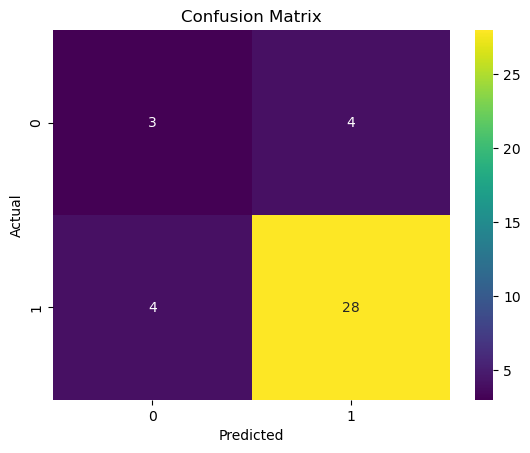

In [40]:
cm=confusion_matrix(ytest,nbpred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [43]:
#Dimensionality Reduction using TSNE
from sklearn.manifold import TSNE
x_scaled=ss.fit_transform(x)

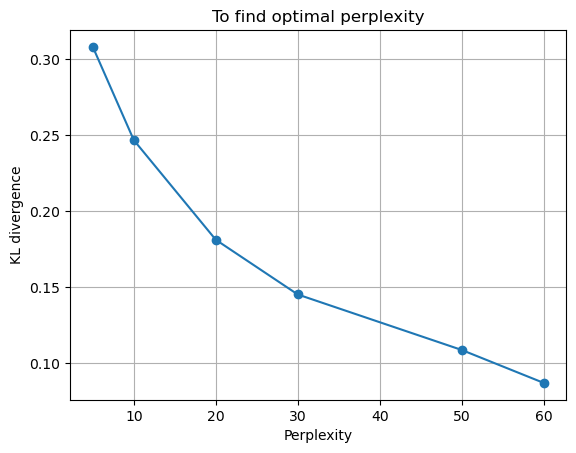

In [45]:
perplex=[5,10,20,30,50,60]
kl_divergence=[]
for p in perplex:
    tsne=TSNE(n_components=2,perplexity=p,random_state=42)
    tsne.fit_transform(x)
    kl_divergence.append(tsne.kl_divergence_)
plt.plot(perplex,kl_divergence,marker='o')
plt.xlabel("Perplexity")
plt.ylabel('KL divergence')
plt.title("To find optimal perplexity")
plt.grid(True)
plt.show()

In [46]:
#First huge decrease happens at 50 therefore optimal perplexity is 50
tsne=TSNE(n_components=2,perplexity=50,learning_rate=100,max_iter=1000)
x_tsne=tsne.fit_transform(x_scaled)

In [48]:
data_tsne=pd.DataFrame()
data_tsne['Component 1']=x_tsne[:,0]
data_tsne['Component 2']=x_tsne[:,1]
data_tsne['Status']=y

In [51]:
data_tsne.head()

,Component 1,Component 2,Status
0,1.917855,-5.186585,1
1,2.313236,-6.300538,1
2,2.104896,-6.120064,1
3,2.163154,-6.187034,1
4,2.309190,-6.646706,1


In [52]:
x=data_tsne.drop('Status',axis=1)
y=data_tsne['Status']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
#Logistic Regression
lr_model.fit(x_train,y_train)

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', penalty='l1',
                   solver='liblinear')

In [58]:
lrpred=lr_model.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,lrpred))
print(classification_report(y_test,lrpred))

Accuracy :  0.7435897435897436
              precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.87      0.81      0.84        32

    accuracy                           0.74        39
   macro avg       0.60      0.62      0.61        39
weighted avg       0.77      0.74      0.76        39



In [60]:
#Decision Tree
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10)

In [62]:
dtpred=dt.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,dtpred))
print(classification_report(y_test,dtpred))

Accuracy :  0.7435897435897436
              precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.92      0.75      0.83        32

    accuracy                           0.74        39
   macro avg       0.65      0.73      0.66        39
weighted avg       0.83      0.74      0.77        39



In [63]:
#Random Forest
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,rfpred))
print(classification_report(y_test,rfpred))

Accuracy :  0.8461538461538461
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.96      0.84      0.90        32

    accuracy                           0.85        39
   macro avg       0.75      0.85      0.78        39
weighted avg       0.89      0.85      0.86        39



In [64]:
#SVC
svc.fit(x_train,y_train)
svpred=svc.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,svpred))
print(classification_report(y_test,svpred))

Accuracy :  0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [65]:
#Gradient Boosting
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,gbpred))
print(classification_report(y_test,gbpred))

Accuracy :  0.8974358974358975
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.88      0.93        32

    accuracy                           0.90        39
   macro avg       0.82      0.94      0.86        39
weighted avg       0.93      0.90      0.91        39



In [66]:
#GLM
x_const=sm.add_constant(x)
model=sm.GLM(y,x_const,sm.families.Binomial())
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Status   No. Observations:                  195
Model:                            GLM   Df Residuals:                      192
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76.252
Date:                Sat, 08 Feb 2025   Deviance:                       152.50
Time:                        15:28:09   Pearson chi2:                     145.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2840
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8701      0.291      6.424      0.000       1.300       2.441
Component 1     0.3624      0.068      5.326      0.000       0.229       0.496
Component 2    -0.1009      0.075     -1.344      0.179      -0.248       0.046
===============================================================================
"""

In [67]:
glmpred=result.predict(x_const)
glmpred=(glmpred>0.5).astype(int)
print("Accuracy : ",accuracy_score(y,glmpred))

Accuracy :  0.8153846153846154


In [90]:
#Naive Bayes
nb.fit(x_train,y_train)
nbpred=nb.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,nbpred))
print(classification_report(y_test,nbpred))

Accuracy :  0.7948717948717948
              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39



In [71]:
#Neural Networks
x=data.data.features
y=data.data.targets

In [72]:
x_scaled=ss.fit_transform(x)

In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(128,64,32),activation='relu',solver='adam',max_iter=300,random_state=42)
mlp.fit(xtrain,ytrain)

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=300, random_state=42)

In [77]:
mlppred=mlp.predict(xtest)
print('Accuracy : ',accuracy_score(ytest,mlppred))
print(classification_report(ytest,mlppred))

Accuracy :  0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [79]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.regularizers import l1,l2

In [81]:
model = Sequential()
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.0001),
                input_shape=(xtrain.shape[1],)))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(units=32,activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dense(units=1, activation='sigmoid'))  
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,313 (52.00 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9662 - loss: 0.1215 - val_accuracy: 0.8974 - val_loss: 0.2571
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9836 - loss: 0.0868 - val_accuracy: 0.8974 - val_loss: 0.2559
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9836 - loss: 0.0969 - val_accuracy: 0.8974 - val_loss: 0.2584
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9922 - loss: 0.0871 - val_accuracy: 0.8974 - val_loss: 0.2553
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0715 - val_accuracy: 0.8974 - val_loss: 0.2614
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9979 - loss: 0.0647 - val_accuracy: 0.8974 - val_loss: 0.2606
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0643 - val_accuracy: 0.9231 - val_loss: 0.2622
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0609 - val_accuracy: 0.8974 - val_loss: 0.2635


In [88]:
ypred=model.predict(xtest)
ypred=(ypred>0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [89]:
print('Accuracy : ',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy :  0.9230769230769231
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

